In [2]:
#cleaner imports

#importing folders from my drive and unzipping
from google.colab import drive
drive.mount('/content/gdrive')
#!unzip /content/gdrive/MyDrive/fish_data.zip

#python libraries import
import pandas as pd
%pylab inline 
import seaborn as sns
sns.set()

#sklearn libraries
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans

#other libraries
from gensim.models.keyedvectors import KeyedVectors
from os import listdir
from os.path import isfile, join
import os
import skimage
from skimage import io
from IPython.display import SVG

# keras imports
import tensorflow as tf
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Lambda
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras.preprocessing.image import array_to_img
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

#flattening libraries
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pylab as plt
from numpy import array
from sys import getsizeof
import warnings
import PIL

Mounted at /content/gdrive
Populating the interactive namespace from numpy and matplotlib


In [3]:
#using imagedatagenerator
datagen = ImageDataGenerator(rescale = 1/255,
                             validation_split=.2)

datagen_test = ImageDataGenerator(rescale= 1/255)

In [4]:
img_size=[224,224]

In [5]:
#splitting data into train, val, test: train 7208, val = 1802, test = 430

train_set = datagen.flow_from_directory(
    '/content/gdrive/MyDrive/fish_train_val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')



test_set = datagen_test.flow_from_directory(
    '/content/gdrive/MyDrive/fish_50_each',
    target_size = (224,224),
    batch_size=32,
    class_mode='categorical')

Found 9010 images belonging to 9 classes.
Found 430 images belonging to 9 classes.


In [6]:
#splitting data into train, val, test: train 7208, val = 1802, test = 430 ... with new split

train_set2 = datagen.flow_from_directory(
    '/content/gdrive/MyDrive/fish_train_val_v2',
    target_size = (224,224),
    batch_size = 20,
    #batch_size=1,
    class_mode = 'categorical')



test_set2 = datagen_test.flow_from_directory(
    '/content/gdrive/MyDrive/fish_200_each',
    target_size = (224,224),
    batch_size=30,
    #batch_size=1,
    class_mode='categorical')

Found 7600 images belonging to 9 classes.
Found 1830 images belonging to 9 classes.


In [7]:
#building cnn
from tensorflow.keras.layers import InputLayer, GlobalAveragePooling2D

NN = Sequential()

NN.add(InputLayer(input_shape=img_size + [3]))

# Conv block 1.  You can add more conv steps to
# each block to increase model capacity.
NN.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
# NN.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())

# Conv block 2 - note we increase filter dimension as we move
# further into the network. You can add more conv steps to
# each block to increase model capacity.
NN.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
# NN.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())

# Conv block 3 - The conv blocks should be ended with either a flatten
# layer or a global pooling layer. These transform the 2D layers to 1D
# to match the following dense layers.
NN.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))

NN.add(GlobalAveragePooling2D())

# Fully connected block - flattening followed by dense and output layers
# NN.add(Flatten())
NN.add(Dense(20, activation='relu'))
NN.add(Dense(9, activation='softmax'))  # 9 target classes

NN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
NN.summary()




#fitting model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("model2", monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto',
                             period=1)
callback = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1, mode='auto')




NN.fit(train_set, validation_data=test_set, epochs=10, verbose=1, callbacks=[callback])

#len(NN.history['val_acc']) #checking how many epochs are run

#initial scores, no tuning, 10 epoch -- loss: 0.6440 - accuracy: 0.7608 - val_loss: 0.8329 - val_accuracy: 0.6930

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 20)      1820      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 20)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 30)        5430      
                                                                 
 global_average_pooling2d (G  (None, 30)               0

Epoch 1/10
282/282 [==============================] - 2236s 8s/step - loss: 1.9417 - accuracy: 0.2484 - val_loss: 1.9322 - val_accuracy: 0.2674
Epoch 2/10
282/282 [==============================] - 136s 482ms/step - loss: 1.5039 - accuracy: 0.4265 - val_loss: 1.5422 - val_accuracy: 0.4465
Epoch 3/10
282/282 [==============================] - 130s 462ms/step - loss: 1.2370 - accuracy: 0.5414 - val_loss: 1.5104 - val_accuracy: 0.4651
Epoch 4/10
282/282 [==============================] - 128s 453ms/step - loss: 1.0797 - accuracy: 0.5895 - val_loss: 1.4060 - val_accuracy: 0.4000
Epoch 5/10
282/282 [==============================] - 125s 444ms/step - loss: 0.9843 - accuracy: 0.6330 - val_loss: 1.2497 - val_accuracy: 0.5605
Epoch 6/10
282/282 [==============================] - 127s 451ms/step - loss: 0.9011 - accuracy: 0.6714 - val_loss: 1.2228 - val_accuracy: 0.5000
Epoch 7/10
282/282 [==============================] - 127s 451ms/step - loss: 0.8161 - accuracy: 0.7031 - val_loss: 0.9557 - v

In [ ]:
#building cnn v2 - usable for the plot because this will be a history object
from tensorflow.keras.layers import InputLayer, GlobalAveragePooling2D

NN = Sequential()

NN.add(InputLayer(input_shape=img_size + [3]))

# Conv block 1.  You can add more conv steps to
# each block to increase model capacity.
NN.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
# NN.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())

# Conv block 2 - note we increase filter dimension as we move
# further into the network. You can add more conv steps to
# each block to increase model capacity.
NN.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
# NN.add(Conv2D(filters=16, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())

# Conv block 3 - The conv blocks should be ended with either a flatten
# layer or a global pooling layer. These transform the 2D layers to 1D
# to match the following dense layers.
NN.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))

NN.add(GlobalAveragePooling2D())

# Fully connected block - flattening followed by dense and output layers
# NN.add(Flatten())
NN.add(Dense(20, activation='relu'))
NN.add(Dense(9, activation='softmax'))  # 9 target classes

NN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
NN.summary()




#fitting model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("model2", monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto',
                             period=1)
callback = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1, mode='auto')




#NN = NN.fit(train_set2, validation_data=test_set2, epochs=50, verbose=1) #using NN= NN.fit makes this a history obj for plotting acc/loss below (new split)


In [15]:
#using NN= NN.fit makes this a history obj for plotting acc/loss below (old split)
NN2 = NN.fit(train_set, validation_data=test_set, epochs=50, verbose=1)

Epoch 1/50
282/282 [==============================] - 163s 578ms/step - loss: 1.9981 - accuracy: 0.2608 - val_loss: 1.8294 - val_accuracy: 0.3326
Epoch 2/50
282/282 [==============================] - 142s 503ms/step - loss: 1.5828 - accuracy: 0.4141 - val_loss: 1.6154 - val_accuracy: 0.4326
Epoch 3/50
282/282 [==============================] - 131s 464ms/step - loss: 1.4245 - accuracy: 0.4809 - val_loss: 1.5357 - val_accuracy: 0.4256
Epoch 4/50
282/282 [==============================] - 132s 469ms/step - loss: 1.3342 - accuracy: 0.5214 - val_loss: 1.8353 - val_accuracy: 0.3419
Epoch 5/50
282/282 [==============================] - 130s 460ms/step - loss: 1.2653 - accuracy: 0.5413 - val_loss: 1.8757 - val_accuracy: 0.4093
Epoch 6/50
282/282 [==============================] - 130s 462ms/step - loss: 1.1922 - accuracy: 0.5678 - val_loss: 1.7697 - val_accuracy: 0.4721
Epoch 7/50
282/282 [==============================] - 131s 466ms/step - loss: 1.1382 - accuracy: 0.5876 - val_loss: 2.0895 -

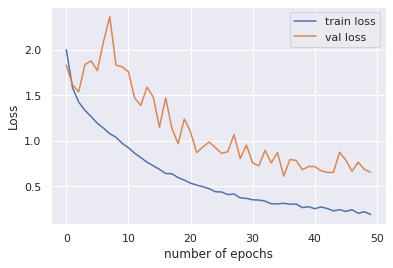

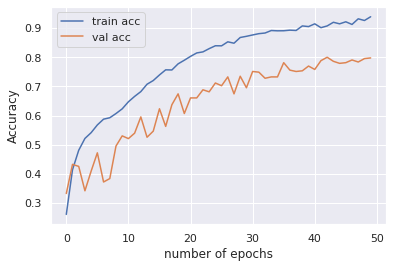

In [17]:
#only works if NN/NN2 is a history object

#plotting loss and acc

plt.plot(NN2.history['loss'], label='train loss')
plt.plot(NN2.history['val_loss'], label='val loss')
plt.xlabel('number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('NN_LossVal_loss_old_split')
plt.show()


# plot the accuracy
plt.plot(NN2.history['accuracy'], label='train acc')
plt.plot(NN2.history['val_accuracy'], label='val acc')
plt.xlabel('number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('NN_AccVal_acc_old_split')
plt.show()




In [ ]:
#trying to plot a confusion matrix only works if NN/NN2 is not a history obj

from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import ConfusionMatrixDisplay

#model_variable = r2_new_split

#predictions = r2_new_split.predict(test_set2)
#predictions

num_of_test_samples = 1830
batch_size = 30

Y_pred = NN.predict(test_set2, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


cm = confusion_matrix(y_true = test_set2.classes, y_pred=y_pred, labels=test_set2.classes)




disp = ConfusionMatrixDisplay.from_predictions(test_set2.classes, y_pred)

#disp.plot()

plt.show()